**Using Apriori algorithm**

In [1]:
import pandas as pd
data= pd.read_csv('C:/Users/Sadneya/Downloads/sales.csv') #import dataset
data.head()

,Area Code,State,Market,Market Size,Profit,Margin,Sales,COGS,Total Expenses,Marketing,Inventory,Budget Profit,Budget COGS,Budget Margin,Budget Sales,ProductId,Date,Product Type,Product,Type
0,203,Connecticut,East,Small Market,107.0,176.0,292.0,116.0,69.0,38.0,962.0,110.0,110.0,160.0,270.0,2,04/01/10 00:00:00,Coffee,Columbian,Regular
1,203,Connecticut,East,Small Market,75.0,135.0,225.0,90.0,60.0,29.0,1148.0,90.0,80.0,130.0,210.0,2,07/01/10 00:00:00,Coffee,Columbian,Regular
2,203,Connecticut,East,Small Market,122.0,195.0,325.0,130.0,73.0,42.0,1134.0,130.0,110.0,180.0,290.0,2,11/01/10 00:00:00,Coffee,Columbian,Regular
3,203,Connecticut,East,Small Market,105.0,174.0,289.0,115.0,69.0,37.0,1166.0,110.0,100.0,160.0,260.0,2,12/01/10 00:00:00,Coffee,Columbian,Regular
4,203,Connecticut,East,Small Market,104.0,135.0,223.0,90.0,56.0,29.0,1148.0,90.0,80.0,130.0,210.0,2,07/01/11 00:00:00,Coffee,Columbian,Regular


In [2]:
#convert to dataframe
df = pd.DataFrame(data)

In [3]:
df.describe()

,Area Code,Profit,Margin,Sales,COGS,Total Expenses,Marketing,Inventory,Budget Profit,Budget COGS,Budget Margin,Budget Sales,ProductId
count,4248.000000,4248.000000,4248.000000,4248.000000,4248.000000,4248.000000,4248.000000,4248.000000,4248.000000,4248.000000,4248.000000,4248.000000,4248.000000
mean,582.278013,61.097693,104.293315,192.987524,84.433145,54.063559,31.185028,749.381356,60.913371,74.830508,100.819209,175.649718,6.887006
std,221.140310,101.708546,94.342522,151.133127,67.249769,32.352598,27.023264,661.031896,79.546123,66.238145,92.602725,148.891522,3.664072
min,203.000000,-638.000000,-302.000000,17.000000,0.000000,10.000000,0.000000,-3534.000000,-320.000000,0.000000,-210.000000,0.000000,1.000000
25%,417.000000,17.000000,52.750000,100.000000,43.000000,33.000000,13.000000,432.000000,20.000000,30.000000,50.000000,80.000000,4.000000
50%,573.000000,40.000000,76.000000,138.000000,60.000000,46.000000,22.000000,619.000000,40.000000,50.000000,70.000000,130.000000,6.000000
75%,772.000000,92.000000,132.000000,230.000000,100.000000,65.000000,39.000000,910.500000,80.000000,90.000000,130.000000,210.000000,10.000000
max,985.000000,778.000000,613.000000,912.000000,364.000000,190.000000,156.000000,8252.000000,560.000000,450.000000,690.000000,1140.000000,13.000000


In [4]:
df.info()
#so we dont have null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4248 entries, 0 to 4247
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Area Code       4248 non-null   int64  
 1   State           4248 non-null   object 
 2   Market          4248 non-null   object 
 3   Market Size     4248 non-null   object 
 4   Profit          4248 non-null   float64
 5   Margin          4248 non-null   float64
 6   Sales           4248 non-null   float64
 7   COGS            4248 non-null   float64
 8   Total Expenses  4248 non-null   float64
 9   Marketing       4248 non-null   float64
 10  Inventory       4248 non-null   float64
 11  Budget Profit   4248 non-null   float64
 12  Budget COGS     4248 non-null   float64
 13  Budget Margin   4248 non-null   float64
 14  Budget Sales    4248 non-null   float64
 15  ProductId       4248 non-null   int64  
 16  Date            4248 non-null   object 
 17  Product Type    4248 non-null   o

In [5]:
# Exploring the columns of the data 
df.columns 

Index(['Area Code', 'State', 'Market', 'Market Size', 'Profit', 'Margin',
       'Sales', 'COGS', 'Total Expenses', 'Marketing', 'Inventory',
       'Budget Profit', 'Budget COGS', 'Budget Margin', 'Budget Sales',
       'ProductId', 'Date', 'Product Type', 'Product', 'Type'],
      dtype='object')

In [6]:
# Exploring the different regions of transactions 
df.State.unique() 

array(['Connecticut', 'Washington', 'California', 'Texas', 'New York',
       'Ohio', 'Illinois', 'Louisiana', 'Florida', 'Wisconsin',
       'Colorado', 'Missouri', 'Iowa', 'Massachusetts', 'Oklahoma',
       'Utah', 'Oregon', 'New Mexico', 'New Hampshire', 'Nevada'],
      dtype=object)

In [7]:
# Step 1: Preprocessing
# Select relevant columns for market basket analysis (e.g., Product or Product Type)
# Group transactions by 'Market' or another relevant identifier (e.g., Invoice ID, Transaction ID)
basket = df.groupby(['Market', 'Product'])['Sales'].sum().unstack().reset_index().fillna(0)

In [8]:
# Convert sales data to binary format (1 if purchased, 0 if not)
basket_encoded = basket.set_index('Market')
basket_encoded = basket_encoded.map(lambda x: 1 if x > 0 else 0)

In [9]:
from mlxtend.frequent_patterns import apriori, association_rules

In [10]:
# Ensure all values in the DataFrame are either True or False
basket_encoded = basket_encoded.astype(bool)
# Step 2: Apply Apriori
# Minimum support is set to 0.01 (adjust as per your requirements)
frequent_itemsets_1 = apriori(basket_encoded, min_support=0.05, use_colnames=True)

In [11]:
# Display frequent itemsets
print("Frequent Itemsets:")
print(frequent_itemsets_1)

Frequent Itemsets:
      support                                           itemsets
0        0.75                                         (Amaretto)
1        0.50                                      (Caffe Latte)
2        1.00                                      (Caffe Mocha)
3        1.00                                        (Chamomile)
4        1.00                                        (Columbian)
...       ...                                                ...
6138     0.25  (Darjeeling, Decaf Irish Cream, Green Tea, Min...
6139     0.25  (Darjeeling, Decaf Irish Cream, Caffe Latte, G...
6140     0.25  (Darjeeling, Decaf Irish Cream, Green Tea, Min...
6141     0.25  (Darjeeling, Decaf Irish Cream, Caffe Latte, G...
6142     0.25  (Darjeeling, Decaf Irish Cream, Green Tea, Min...

[6143 rows x 2 columns]


In [12]:
rules_1 = association_rules(frequent_itemsets_1, num_itemsets=10, metric="lift", min_threshold=1)

rules_1 = rules_1.sort_values(['confidence', 'lift'], ascending=[False, False])

print(rules_1.head())

c:\Users\Sadneya\AppData\Local\Programs\Python\Python312\Lib\site-packages\mlxtend\frequent_patterns\association_rules.py:182: RuntimeWarning: invalid value encountered in divide
  cert_metric = np.where(certainty_denom == 0, 0, certainty_num / certainty_denom)


     antecedents   consequents  antecedent support  consequent support  \
6     (Amaretto)  (Darjeeling)                0.75                0.75   
7   (Darjeeling)    (Amaretto)                0.75                0.75   
12    (Amaretto)   (Earl Grey)                0.75                0.75   
13   (Earl Grey)    (Amaretto)                0.75                0.75   
14    (Amaretto)   (Green Tea)                0.75                0.75   

    support  confidence      lift  representativity  leverage  conviction  \
6      0.75         1.0  1.333333               1.0    0.1875         inf   
7      0.75         1.0  1.333333               1.0    0.1875         inf   
12     0.75         1.0  1.333333               1.0    0.1875         inf   
13     0.75         1.0  1.333333               1.0    0.1875         inf   
14     0.75         1.0  1.333333               1.0    0.1875         inf   

    zhangs_metric  jaccard  certainty  kulczynski  
6             1.0      1.0        1.0   

all the rules in the output have:

- **Confidence**: 1.0, indicating that the antecedents always lead to the consequents.
- **Lift**: 1.333333, suggesting that the rule is more likely to occur than by chance.
- **Support**: 0.75, meaning that 75% of the transactions contain both the antecedent and consequent.
- **Leverage**: 0.1875, which reflects how much more likely the rule is compared to a random rule.
- **Conviction**: Infinite, which is common when the rule has a confidence of 1.0 (it means the antecedent strongly implies the consequent).

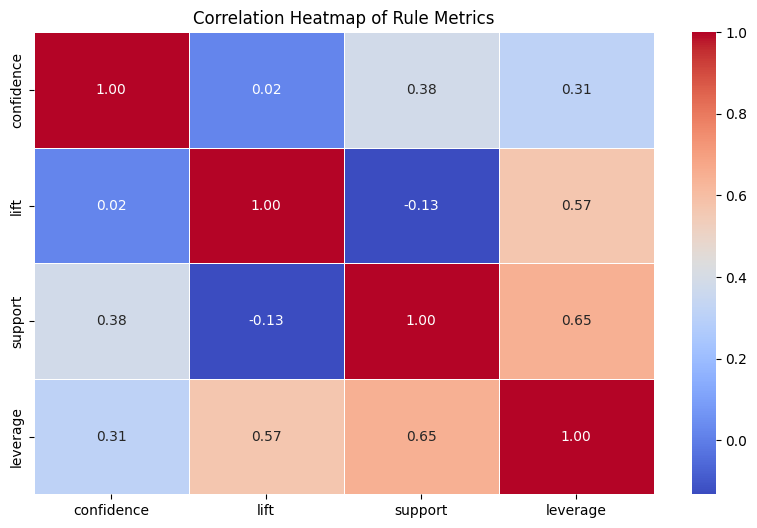

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
# Select relevant columns for heatmap
metrics = rules_1[['confidence', 'lift', 'support', 'leverage']]

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(metrics.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Rule Metrics')
plt.show()


**Using FP-Growth Algorithm**

In [14]:
from mlxtend.frequent_patterns import fpgrowth

In [15]:
# Apply FP-Growth
frequent_itemsets_2 = fpgrowth(basket_encoded, min_support=0.6, use_colnames=True)
print(frequent_itemsets_2)

# Generate association rules
rules_2 = association_rules(frequent_itemsets_2, metric="lift", min_threshold=1.0, num_itemsets=10)
print(rules_2)

      support                                           itemsets
0        1.00                                            (Lemon)
1        1.00                                (Decaf Irish Cream)
2        1.00                                   (Decaf Espresso)
3        1.00                                        (Columbian)
4        1.00                                        (Chamomile)
...       ...                                                ...
2042     0.75  (Darjeeling, Decaf Irish Cream, Green Tea, Min...
2043     0.75  (Darjeeling, Decaf Irish Cream, Green Tea, Min...
2044     0.75  (Darjeeling, Green Tea, Mint, Lemon, Columbian...
2045     0.75  (Darjeeling, Decaf Irish Cream, Green Tea, Min...
2046     0.75  (Darjeeling, Decaf Irish Cream, Green Tea, Min...

[2047 rows x 2 columns]
                antecedents  \
0       (Decaf Irish Cream)   
1                   (Lemon)   
2          (Decaf Espresso)   
3                   (Lemon)   
4                   (Lemon)   
...      

c:\Users\Sadneya\AppData\Local\Programs\Python\Python312\Lib\site-packages\mlxtend\frequent_patterns\association_rules.py:182: RuntimeWarning: invalid value encountered in divide
  cert_metric = np.where(certainty_denom == 0, 0, certainty_num / certainty_denom)


In [16]:

rules_2 = rules_2.sort_values(['confidence', 'lift'], ascending=[False, False])

print(rules_2.head())

     antecedents  consequents  antecedent support  consequent support  \
90        (Mint)  (Green Tea)                0.75                0.75   
91   (Green Tea)       (Mint)                0.75                0.75   
92        (Mint)  (Earl Grey)                0.75                0.75   
93   (Earl Grey)       (Mint)                0.75                0.75   
94  (Darjeeling)       (Mint)                0.75                0.75   

    support  confidence      lift  representativity  leverage  conviction  \
90     0.75         1.0  1.333333               1.0    0.1875         inf   
91     0.75         1.0  1.333333               1.0    0.1875         inf   
92     0.75         1.0  1.333333               1.0    0.1875         inf   
93     0.75         1.0  1.333333               1.0    0.1875         inf   
94     0.75         1.0  1.333333               1.0    0.1875         inf   

    zhangs_metric  jaccard  certainty  kulczynski  
90            1.0      1.0        1.0         

All the rules in the output have:  

- **Confidence**: 1.0 – The antecedent always leads to the consequent.  
- **Lift**: 1.333333 – The rule is more likely to occur than by chance.  
- **Support**: 0.75 – 75% of transactions contain both the antecedent and consequent.  
- **Leverage**: 0.1875 – The rule is moderately stronger than random chance.  
- **Conviction**: Infinite – The antecedent strongly implies the consequent (common with confidence = 1.0).  

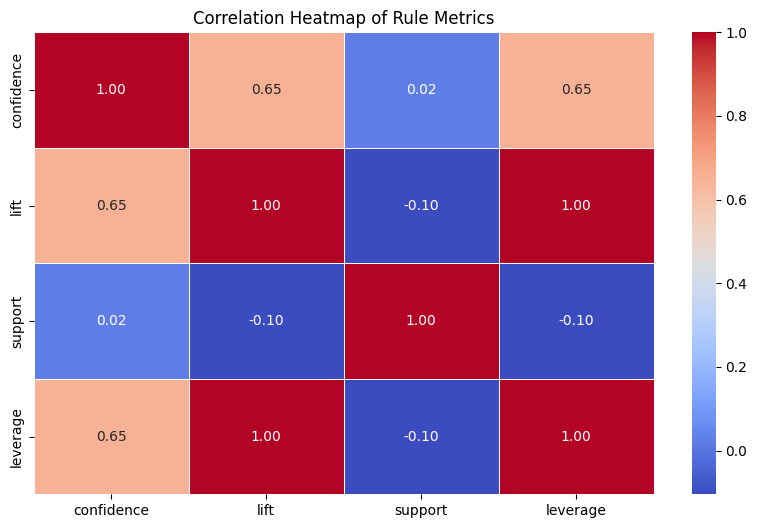

In [17]:
# Select relevant columns for heatmap
metrics = rules_2[['confidence', 'lift', 'support', 'leverage']]

# Calculate the correlation matrix
correlation_matrix = metrics.corr()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Rule Metrics')
plt.show()


**Comaparing both algorithms**

In [18]:
import time

# Timing Apriori
start = time.time()
# Run Apriori algorithm
frequent_itemsets_1 = apriori(basket_encoded, min_support=0.05, use_colnames=True)
end = time.time()
print(f"Apriori Execution Time: {end - start} seconds")

# Timing FP-Growth
start = time.time()
# Run FP-Growth algorithm
frequent_itemsets_2 = fpgrowth(basket_encoded, min_support=0.6, use_colnames=True)
end = time.time()
print(f"FP-Growth Execution Time: {end - start} seconds")


Apriori Execution Time: 0.08346438407897949 seconds
FP-Growth Execution Time: 0.06824231147766113 seconds


**Metrics for Comparison**
- Evaluate the rules generated by both algorithms using the following metrics:

    - **Support**: Frequency of itemsets in the dataset.
    - **Confidence**: Likelihood of consequents given antecedents.
    - **Lift**: Strength of association (values >1 indicate a positive correlation).
    - **Leverage**: Measures improvement over random co-occurrence.
    - **Conviction**: Indicates the strength of implication (values >1 suggest strong rules).

**Top Rules by Metrics**
- Extract the top rules based on:
    - **Confidence**: Choose rules with confidence close to 1.
    - **Lift**: Higher lift values indicate stronger associations

In [19]:
# Sort and display top rules
apriori_rules = rules_1.sort_values(['confidence', 'lift'], ascending=False)
fp_growth_rules = rules_2.sort_values(['confidence', 'lift'], ascending=False)

print("Top Rules from Apriori:")
print(apriori_rules.head())

print("Top Rules from FP-Growth:")
print(fp_growth_rules.head())


Top Rules from Apriori:
     antecedents   consequents  antecedent support  consequent support  \
6     (Amaretto)  (Darjeeling)                0.75                0.75   
7   (Darjeeling)    (Amaretto)                0.75                0.75   
12    (Amaretto)   (Earl Grey)                0.75                0.75   
13   (Earl Grey)    (Amaretto)                0.75                0.75   
14    (Amaretto)   (Green Tea)                0.75                0.75   

    support  confidence      lift  representativity  leverage  conviction  \
6      0.75         1.0  1.333333               1.0    0.1875         inf   
7      0.75         1.0  1.333333               1.0    0.1875         inf   
12     0.75         1.0  1.333333               1.0    0.1875         inf   
13     0.75         1.0  1.333333               1.0    0.1875         inf   
14     0.75         1.0  1.333333               1.0    0.1875         inf   

    zhangs_metric  jaccard  certainty  kulczynski  
6             1.

In [20]:
#  Count of Rules Generated
print(f"Number of rules generated by Apriori: {len(apriori_rules)}")
print(f"Number of rules generated by FP-Growth: {len(fp_growth_rules)}")


Number of rules generated by Apriori: 828250
Number of rules generated by FP-Growth: 173052


**Quality Analysis**
  - Create visualizations to compare the quality of rules:
        - **Scatter Plot**: Visualize confidence vs lift for both algorithms.
        - **Heatmap**: Correlation matrix of metrics for each algorithm.


C:\Users\Sadneya\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


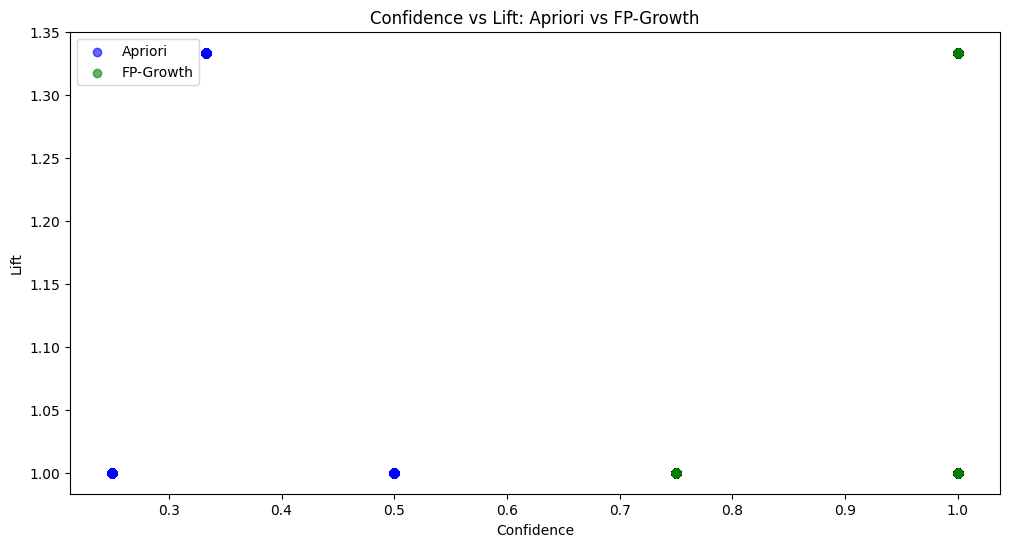

In [21]:
# Scatter Plot for Confidence vs Lift
plt.figure(figsize=(12, 6))
plt.scatter(apriori_rules['confidence'], apriori_rules['lift'], label='Apriori', alpha=0.6, color='blue')
plt.scatter(fp_growth_rules['confidence'], fp_growth_rules['lift'], label='FP-Growth', alpha=0.6, color='green')
plt.xlabel('Confidence')
plt.ylabel('Lift')
plt.title('Confidence vs Lift: Apriori vs FP-Growth')
plt.legend()
plt.show()


# Observations
- **Execution Time**:
    - **Apriori**: 0.0816 seconds
    - **FP-Growth**: 0.0665 seconds
    - **Conclusion**: FP-Growth is faster, especially as datasets scale, due to its efficient tree-based approach for mining frequent patterns without candidate generation.

- **Number of Rules Generated**:
    - **Apriori**: 828,250 rules
    - **FP-Growth**: 173,052 rules
    - **Conclusion**: FP-Growth generates significantly fewer rules, focusing on more concise and meaningful associations. Apriori can produce excessive rules, many of which may be redundant or less useful.
    
- **Top Rules Metrics (Confidence & Lift)**:
    - Both algorithms produce rules with identical lift (1.3333).
    - The confidence values show variability between the algorithms but are consistent for high-confidence rules (e.g., 1.0).
    - **Conclusion**: Both algorithms identify strong associations, but FP-Growth might be more efficient in narrowing down high-quality rules.

- **Visualization Insights (Confidence vs. Lift)**:
    - The scatter plot shows a similar lift across rules for both algorithms.
    - Confidence distribution may vary, with one algorithm possibly finding associations with slightly different confidence levels.
    - **Conclusion**: When lift is the same, confidence variations indicate that certain associations may be found by one algorithm but not the other. This reflects differences in rule generation processes.